In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [46]:
df = pd.read_excel('clean excel.xlsx')
energy = df['Energy Density (J/mm3)'].to_numpy()
density = df['Part Density (%)'].to_numpy()
X = np.transpose(np.array([df['Scan Speed'], df['Laser Power '], df['Hatch Spacing (um)']]))
print(len(X),len(energy),len(density))

42 42 42


In [48]:
target = energy
reg = LinearRegression().fit(X, target)
print(reg.score(X, target))
print(reg.coef_, reg.intercept_)

0.28929102473054535
[-0.0016412   0.02558769 -0.04219382] 98.12426992944951


In [55]:
target = energy
model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, input_shape=(3,), activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X[:-2], target[:-2], epochs=100,
             validation_data=(X[-2:], target[-2:]))

Epoch 1/100
2/2 [==============================] - 0s 68ms/step - loss: 16223.2158 - val_loss: 11186.4004
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 9242.7979 - val_loss: 5184.9736
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 11577.3154 - val_loss: 2526.3628
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 4393.4541 - val_loss: 3541.3757
Epoch 5/100
2/2 [==============================] - 0s 18ms/step - loss: 3303.9316 - val_loss: 7259.9629
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 6961.1118 - val_loss: 3727.5618
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 2707.2019 - val_loss: 1366.3981
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 1664.5785 - val_loss: 1936.6490
Epoch 9/100
2/2 [==============================] - 0s 25ms/step - loss: 3863.0266 - val_loss: 1963.0858
Epoch 10/100
2/2 [==============================] - 0s 14ms/s

2/2 [==============================] - 0s 14ms/step - loss: 607.3785 - val_loss: 12.6079
Epoch 81/100
2/2 [==============================] - 0s 13ms/step - loss: 524.7931 - val_loss: 36.2523
Epoch 82/100
2/2 [==============================] - 0s 13ms/step - loss: 498.0156 - val_loss: 65.6171
Epoch 83/100
2/2 [==============================] - 0s 13ms/step - loss: 547.7415 - val_loss: 90.0135
Epoch 84/100
2/2 [==============================] - 0s 13ms/step - loss: 581.7775 - val_loss: 103.8657
Epoch 85/100
2/2 [==============================] - 0s 13ms/step - loss: 529.5110 - val_loss: 107.8393
Epoch 86/100
2/2 [==============================] - 0s 13ms/step - loss: 531.0294 - val_loss: 78.1401
Epoch 87/100
2/2 [==============================] - 0s 13ms/step - loss: 504.8289 - val_loss: 70.7180
Epoch 88/100
2/2 [==============================] - 0s 13ms/step - loss: 522.3322 - val_loss: 35.9073
Epoch 89/100
2/2 [==============================] - 0s 14ms/step - loss: 507.4323 - val_loss:

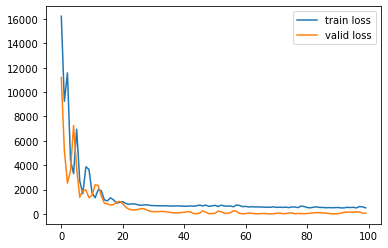

In [56]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='valid loss')
plt.legend()
# plt.ylim(0, 500) 
plt.show()

In [57]:
print('Prediction:',model.predict(X[-2:]))
print('GT:',target[-2:])

Prediction: [[ 27.06295]
 [111.55253]]
GT: [ 34.72222222 104.16666667]


In [45]:
print(target)

[ 37.03703704  24.69135802  38.79365079  23.21578884  74.07407407
  34.10934744  74.80694981  20.46560847  44.88416988  64.65608466
  75.4549192   38.6929814   20.88406385  55.55555556  37.03703704
  58.19047619  34.82368326 111.1111111   51.16402116 112.2104247
  30.6984127   67.32625483  96.98412698 113.1823788   58.0394721
  31.32609578]


In [5]:
# X = np.array([[230,1200,90], [280,1200,90], [255,1719.6,90], 
#               [255,1373.22,122.66],[180,1200,90],[205,680.4,90],
#               [205,1026.78,57.34],[255,680.4,90],[255,1026.78,57.34],
#               [205,1719.6,90],[230,1546.44,57.34],[205,1373.22,122.66],
#               [230,853.56,122.66]])

# y = np.array([0.186,0.436,1.345,3.477,2.935,0.011,0.004,0.16,0.039,10.948,0.062,4.452,0.279])

In [38]:
# Linear Regression SKLEARN
df = pd.read_excel('Book1.xlsx')
x = np.array([np.array(df['P (W)']),np.array(df['v (mm/s)']),
             np.array(df['h (um)']),np.array(df['P2']),np.array(df['V2']),
             np.array(df['H2']),np.array(df['PV']),np.array(df['PH']),
             np.array(df['VH']),
             ]).transpose()
reg = LinearRegression().fit(x, y)
print(reg.score(x, y))
print(reg.coef_, reg.intercept_)

0.8953235804119074
[-1.50924198e-01  1.35299387e-02 -3.43458560e-01  5.99800000e-04
  9.46398115e-06  3.57790726e-04 -1.87682833e-04  6.86173311e-04
  1.35488869e-04] 24.282128377570633


In [18]:
y

array([1.8600e-01, 4.3600e-01, 1.3450e+00, 3.4770e+00, 2.9350e+00,
       1.1000e-02, 4.0000e-03, 1.6000e-01, 3.9000e-02, 1.0948e+01,
       6.2000e-02, 4.4520e+00, 2.7900e-01])